In [1]:
import torch

In [2]:
import numpy as np

In [3]:
torch.__version__

'1.13.0+cu116'

In [9]:
x = torch.tensor(2.0, requires_grad=True)

In [10]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1
print(y)

tensor(63., grad_fn=<AddBackward0>)


In [6]:
y.backward() #Does the derivative of the tensor function.

In [11]:
x.grad

In [12]:
x = torch.tensor([[1., 2., 3.], [3., 2.,1.]], requires_grad=True)

In [13]:
print(x)

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)


In [14]:
y = 3*x + 2

In [15]:
print(y)

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)


In [18]:
z = 2*y**2

In [19]:
print(z)

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)


In [20]:
out = z.mean()

In [21]:
print(out)

tensor(140., grad_fn=<MeanBackward0>)


In [22]:
out.backward()

In [23]:
print(x.grad)

tensor([[10., 16., 22.],
        [22., 16., 10.]])


In [62]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [63]:
import torch.nn as nn

In [64]:
X = torch.linspace(1, 50, 50).reshape(-1, 1)

In [65]:
torch.manual_seed(71)
e = torch.randint(-8, 9, (50, 1), dtype=torch.float)

In [66]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [67]:
y = 2*X + 1 + e

In [68]:
y.shape

torch.Size([50, 1])

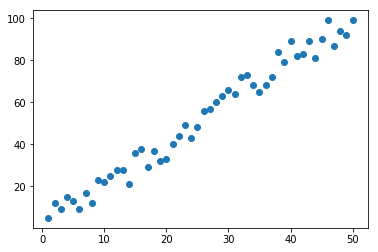

In [69]:
plt.scatter(X.numpy(), y.numpy())

In [70]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [71]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
    def forward(self, x): #plugs in x to get a value
        y_pred = self.linear(x)
        return y_pred

In [72]:
torch.manual_seed(59)

#This is the actual model which can be passed around unserialized
model = Model(1, 1)

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [73]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [74]:
x = torch.tensor([2.0])
print(model.forward(x)) #plug in 2

tensor([1.1758], grad_fn=<AddBackward0>)


In [75]:
x1 = np.linspace(0.0, 50.0, 50)

In [76]:
w1 = 0.1059
b1 = 0.9637

y1= w1*x1+b1

In [77]:
y1

array([0.9637    , 1.07176122, 1.17982245, 1.28788367, 1.3959449 ,
       1.50400612, 1.61206735, 1.72012857, 1.8281898 , 1.93625102,
       2.04431224, 2.15237347, 2.26043469, 2.36849592, 2.47655714,
       2.58461837, 2.69267959, 2.80074082, 2.90880204, 3.01686327,
       3.12492449, 3.23298571, 3.34104694, 3.44910816, 3.55716939,
       3.66523061, 3.77329184, 3.88135306, 3.98941429, 4.09747551,
       4.20553673, 4.31359796, 4.42165918, 4.52972041, 4.63778163,
       4.74584286, 4.85390408, 4.96196531, 5.07002653, 5.17808776,
       5.28614898, 5.3942102 , 5.50227143, 5.61033265, 5.71839388,
       5.8264551 , 5.93451633, 6.04257755, 6.15063878, 6.2587    ])

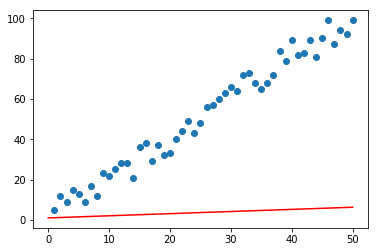

In [78]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1, y1, 'r')

In [79]:
criterion = nn.MSELoss()

In [80]:
#This is the actual math machine, Stochastic gradient descent. This is where the steps are performed black box style.
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

'''
Basically we have...
The Model Object: This contains all the weights/biases and structure of neurons
The Loss Function Object: This simply calculates loss
& The Optimizer function: This is a math tool which mutates the model for you.
'''

In [81]:
epochs = 50
losses = []

for i in range(epochs):
    i +=1

    #Plug in X
    y_pred = model.forward(X)

    # CALCULATE MEAN SQUARE ERROR OR HOW FAR OFF THE PRED IS, COST FUNCTION
    loss = criterion(y_pred, y)

    # RECORD LOSS
    losses.append(loss)

    print(f"epoch {i} loss: {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}")

    #ACTUAL LEARNING
    optimizer.zero_grad() # resets grad
    loss.backward() #Finds a better grad
    optimizer.step() #Mutates model to the better grad

epoch 1 loss: 3057.216796875 weight: 0.10597813129425049 bias: 0.9637961387634277
epoch 2 loss: 1588.5311279296875 weight: 3.334900379180908 bias: 1.0604636669158936
epoch 3 loss: 830.2999877929688 weight: 1.0148327350616455 bias: 0.9922628402709961
epoch 4 loss: 438.8524169921875 weight: 2.6817996501922607 bias: 1.0425218343734741
epoch 5 loss: 236.7615203857422 weight: 1.4840211868286133 bias: 1.0076650381088257
epoch 6 loss: 132.4291229248047 weight: 2.3446059226989746 bias: 1.0339646339416504
epoch 7 loss: 78.56572723388672 weight: 1.7262253761291504 bias: 1.0163217782974243
epoch 8 loss: 50.75775909423828 weight: 2.170504093170166 bias: 1.0302516222000122
epoch 9 loss: 36.4012336730957 weight: 1.8512457609176636 bias: 1.0214954614639282
epoch 10 loss: 28.989229202270508 weight: 2.0806007385253906 bias: 1.029038906097412
epoch 11 loss: 25.162382125854492 weight: 1.9157683849334717 bias: 1.0248701572418213
epoch 12 loss: 23.186473846435547 weight: 2.034165620803833 bias: 1.029116272

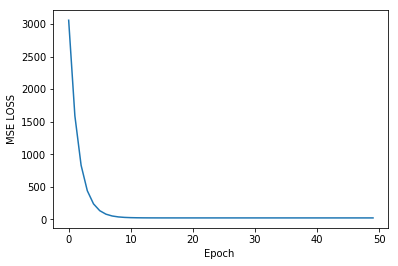

In [82]:
with torch.no_grad():
    plt.plot(range(epochs), losses)
    plt.ylabel('MSE LOSS')
    plt.xlabel('Epoch ')

In [84]:
x = np.linspace(0.0, 50.0, 50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight*x + current_bias

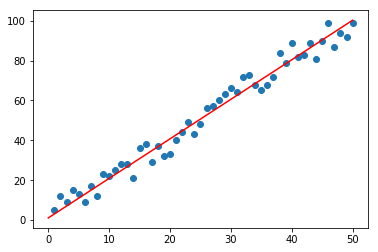

In [85]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x, predicted_y, 'r')